In [1]:
from __future__ import annotations
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
import unicodedata


In [6]:
allstars = pd.read_table('all_stars_drama_raw.tsv')

In [7]:
allstars

,id,label,isGroup,gender,text,corpus,playName
0,mirvolin,Мирволин,False,MALE,"Здравствуй, Герасим! как поживаешь?.. А что, о...",rus,turgenev-zavtrak-u-predvoditelja
1,gerasim,Герасим,False,MALE,Здравствуйте. Где это вы достали лошадь?\nКто ...,rus,turgenev-zavtrak-u-predvoditelja
2,balagalaev,Балагалаев,False,MALE,"Филька! Вельвицкого мне позвать.\nТак, так, та...",rus,turgenev-zavtrak-u-predvoditelja
3,velvitskij,Вельвицкий,False,MALE,"Как же-с, как же-с.\nСлушаю-с. Так, стало быть...",rus,turgenev-zavtrak-u-predvoditelja
4,alupkin,Алупкин,False,MALE,"Доложи. А-а-лупкин, дворянин…\nПокорнейше благ...",rus,turgenev-zavtrak-u-predvoditelja
...,...,...,...,...,...,...,...
34481,SAILORS.TYRE.1_Per,Sailor,False,MALE,Where is Lord Helicanus ? He can resolve you ....,shake,pericles
34482,GENTLEMEN.TYRE.0.1_Per,Gentleman,False,MALE,Doth your Lordship call ?,shake,pericles
34483,SAILORS.MYTILENE.1_Per,Sailor,False,MALE,"Sir ,\nThis is the man that can , in aught you...",shake,pericles
34484,LORDS.MYTILENE.0.1_Per,Lord,False,MALE,"Sir , we have a maid in Mytilene ,\nI durst wa...",shake,pericles


In [8]:
allstars[allstars['text'].apply(lambda x: not isinstance(x, str))]

,id,label,isGroup,gender,text,corpus,playName
10968,le-docteur-sans-pareil,Le Docteur sans Pareil,False,UNKNOWN,NaN,fre,hervilly-docteur-sans-pareil
19609,der_klavierspieler,Der Klavierspieler,False,MALE,NaN,ger,schnitzler-zum-grossen-wurstel
19860,die_anderen_1-1,Die Anderen,True,MALE,NaN,ger,anzengruber-heimgfunden
19965,ein_knappe,Ein Knappe,False,MALE,NaN,ger,hebbel-agnes-bernauer
19975,schildknapp,Ein Schildknapp,False,MALE,NaN,ger,hebbel-agnes-bernauer
...,...,...,...,...,...,...,...
32779,dritter_herr,3. Herr,False,MALE,NaN,ger,chlumberg-die-fuehrer
32921,zehnte_gruppe,Zehnte Gruppe,True,UNKNOWN,NaN,ger,chlumberg-wunder-um-verdun
33030,die_magd,Die Magd,False,FEMALE,NaN,ger,bahr-das-konzert
33548,Epilogue_2H4,Epilogue,False,UNKNOWN,NaN,shake,henry-iv-part-ii


In [9]:
# drop all rows where the text isn't a string

allstars.drop(allstars[allstars['text'].apply(lambda x: not isinstance(x, str))].index, inplace=True)

In [10]:
allstars

,id,label,isGroup,gender,text,corpus,playName
0,mirvolin,Мирволин,False,MALE,"Здравствуй, Герасим! как поживаешь?.. А что, о...",rus,turgenev-zavtrak-u-predvoditelja
1,gerasim,Герасим,False,MALE,Здравствуйте. Где это вы достали лошадь?\nКто ...,rus,turgenev-zavtrak-u-predvoditelja
2,balagalaev,Балагалаев,False,MALE,"Филька! Вельвицкого мне позвать.\nТак, так, та...",rus,turgenev-zavtrak-u-predvoditelja
3,velvitskij,Вельвицкий,False,MALE,"Как же-с, как же-с.\nСлушаю-с. Так, стало быть...",rus,turgenev-zavtrak-u-predvoditelja
4,alupkin,Алупкин,False,MALE,"Доложи. А-а-лупкин, дворянин…\nПокорнейше благ...",rus,turgenev-zavtrak-u-predvoditelja
...,...,...,...,...,...,...,...
34481,SAILORS.TYRE.1_Per,Sailor,False,MALE,Where is Lord Helicanus ? He can resolve you ....,shake,pericles
34482,GENTLEMEN.TYRE.0.1_Per,Gentleman,False,MALE,Doth your Lordship call ?,shake,pericles
34483,SAILORS.MYTILENE.1_Per,Sailor,False,MALE,"Sir ,\nThis is the man that can , in aught you...",shake,pericles
34484,LORDS.MYTILENE.0.1_Per,Lord,False,MALE,"Sir , we have a maid in Mytilene ,\nI durst wa...",shake,pericles


In [12]:
def strip_punctuation(text: str) -> str:
    """
    >>> strip_punctuation(u'something')
    u'something'

    >>> strip_punctuation(u'something.,:else really')
    u'somethingelse really'
    """
    punctutation_cats = set(['Pc', 'Pd', 'Ps', 'Pe', 'Pi', 'Pf', 'Po'])
    return ''.join(x for x in text
                   if unicodedata.category(x) not in punctutation_cats)

In [13]:
def normalise_spaces(text: str) -> str:
    # by default, Python splits on any whitespace eg "a  \t\nb" -> ['a','b']
    return ' '.join(text.split()).strip()

In [14]:
strip_punctuation(normalise_spaces("Je suis      prêt à \t\tt'écouter, mon\n cher frère,")).lower()

'je suis prêt à técouter mon cher frère'

In [15]:
cleanText = allstars.text.map(lambda x: normalise_spaces(strip_punctuation(x).lower()))
allstars['cleanText'] = cleanText
allstars

,id,label,isGroup,gender,text,corpus,playName,cleanText
0,mirvolin,Мирволин,False,MALE,"Здравствуй, Герасим! как поживаешь?.. А что, о...",rus,turgenev-zavtrak-u-predvoditelja,здравствуй герасим как поживаешь а что он еще ...
1,gerasim,Герасим,False,MALE,Здравствуйте. Где это вы достали лошадь?\nКто ...,rus,turgenev-zavtrak-u-predvoditelja,здравствуйте где это вы достали лошадь кто пре...
2,balagalaev,Балагалаев,False,MALE,"Филька! Вельвицкого мне позвать.\nТак, так, та...",rus,turgenev-zavtrak-u-predvoditelja,филька вельвицкого мне позвать так так тактакт...
3,velvitskij,Вельвицкий,False,MALE,"Как же-с, как же-с.\nСлушаю-с. Так, стало быть...",rus,turgenev-zavtrak-u-predvoditelja,как жес как жес слушаюс так стало бытьс бумаги...
4,alupkin,Алупкин,False,MALE,"Доложи. А-а-лупкин, дворянин…\nПокорнейше благ...",rus,turgenev-zavtrak-u-predvoditelja,доложи аалупкин дворянин покорнейше благодарю ...
...,...,...,...,...,...,...,...,...
34481,SAILORS.TYRE.1_Per,Sailor,False,MALE,Where is Lord Helicanus ? He can resolve you ....,shake,pericles,where is lord helicanus he can resolve you o h...
34482,GENTLEMEN.TYRE.0.1_Per,Gentleman,False,MALE,Doth your Lordship call ?,shake,pericles,doth your lordship call
34483,SAILORS.MYTILENE.1_Per,Sailor,False,MALE,"Sir ,\nThis is the man that can , in aught you...",shake,pericles,sir this is the man that can in aught you woul...
34484,LORDS.MYTILENE.0.1_Per,Lord,False,MALE,"Sir , we have a maid in Mytilene ,\nI durst wa...",shake,pericles,sir we have a maid in mytilene i durst wager w...


In [16]:
allstars_long = allstars[allstars.cleanText.apply(lambda x: 2000 < len(x.split(' ')))]
allstars_long

,id,label,isGroup,gender,text,corpus,playName,cleanText
2,balagalaev,Балагалаев,False,MALE,"Филька! Вельвицкого мне позвать.\nТак, так, та...",rus,turgenev-zavtrak-u-predvoditelja,филька вельвицкого мне позвать так так тактакт...
21,darja_ivanovna,Дарья Ивановна,False,FEMALE,. Миша!\nВы… ходили к Попову?\nЧто он вам сказ...,rus,turgenev-provintsialka,миша вы ходили к попову что он вам сказал жду ...
27,graf_ljubin,Граф Любин,False,MALE,". Что же это значит? Никого нет, что ли? Зачем...",rus,turgenev-provintsialka,что же это значит никого нет что ли зачем этот...
28,donja_dolores,Донья Долорес,False,FEMALE,". Однако, мне очень скучно. — Мне нечего читат...",rus,turgenev-neostorozhnost,однако мне очень скучно мне нечего читать я не...
29,don_rafael,Дон Рафаэль,False,MALE,". Что бы вы сделали, прекрасная сеньйора?\n. С...",rus,turgenev-neostorozhnost,что бы вы сделали прекрасная сеньйора сеньйора...
...,...,...,...,...,...,...,...,...
34399,Cloten_Cym,Cloten,False,MALE,"If my shirt were bloody , then to shift it . H...",shake,cymbeline,if my shirt were bloody then to shift it have ...
34402,Iachimo_Cym,Iachimo,False,MALE,"Believe it , sir , I have seen him in Britain ...",shake,cymbeline,believe it sir i have seen him in britain he w...
34410,Belarius_Cym,Belarius,False,MALE,A goodly day not to keep house with such\nWhos...,shake,cymbeline,a goodly day not to keep house with such whose...
34432,Gower_Per,Gower,False,MALE,"To sing a song that old was sung ,\nFrom ashes...",shake,pericles,to sing a song that old was sung from ashes an...


In [ ]:
# allstars.drop(['text'],axis=1).to_pickle('allstars_clean.pkl.zip')

In [ ]:
# allstars_long.drop(['text'],axis=1).to_pickle('allstars_long.pkl.zip')

In [ ]:
# allstars_long

,id,label,isGroup,gender,text,corpus,playName,cleanText
2,balagalaev,Балагалаев,False,MALE,"Филька! Вельвицкого мне позвать.\nТак, так, та...",rus,turgenev-zavtrak-u-predvoditelja,филька вельвицкого мне позвать так так тактакт...
21,darja_ivanovna,Дарья Ивановна,False,FEMALE,. Миша!\nВы… ходили к Попову?\nЧто он вам сказ...,rus,turgenev-provintsialka,миша вы ходили к попову что он вам сказал жду ...
27,graf_ljubin,Граф Любин,False,MALE,". Что же это значит? Никого нет, что ли? Зачем...",rus,turgenev-provintsialka,что же это значит никого нет что ли зачем этот...
28,donja_dolores,Донья Долорес,False,FEMALE,". Однако, мне очень скучно. — Мне нечего читат...",rus,turgenev-neostorozhnost,однако мне очень скучно мне нечего читать я не...
29,don_rafael,Дон Рафаэль,False,MALE,". Что бы вы сделали, прекрасная сеньйора?\n. С...",rus,turgenev-neostorozhnost,что бы вы сделали прекрасная сеньйора сеньйора...
...,...,...,...,...,...,...,...,...
34399,Cloten_Cym,Cloten,False,MALE,"If my shirt were bloody , then to shift it . H...",shake,cymbeline,if my shirt were bloody then to shift it have ...
34402,Iachimo_Cym,Iachimo,False,MALE,"Believe it , sir , I have seen him in Britain ...",shake,cymbeline,believe it sir i have seen him in britain he w...
34410,Belarius_Cym,Belarius,False,MALE,A goodly day not to keep house with such\nWhos...,shake,cymbeline,a goodly day not to keep house with such whose...
34432,Gower_Per,Gower,False,MALE,"To sing a song that old was sung ,\nFrom ashes...",shake,pericles,to sing a song that old was sung from ashes an...


In [2]:
allstars = pd.read_pickle('allstars_clean.pkl.zip')
allstars

,id,label,isGroup,gender,corpus,playName,cleanText
0,mirvolin,Мирволин,False,MALE,rus,turgenev-zavtrak-u-predvoditelja,здравствуй герасим как поживаешь а что он еще ...
1,gerasim,Герасим,False,MALE,rus,turgenev-zavtrak-u-predvoditelja,здравствуйте где это вы достали лошадь кто пре...
2,balagalaev,Балагалаев,False,MALE,rus,turgenev-zavtrak-u-predvoditelja,филька вельвицкого мне позвать так так тактакт...
3,velvitskij,Вельвицкий,False,MALE,rus,turgenev-zavtrak-u-predvoditelja,как жес как жес слушаюс так стало бытьс бумаги...
4,alupkin,Алупкин,False,MALE,rus,turgenev-zavtrak-u-predvoditelja,доложи аалупкин дворянин покорнейше благодарю ...
...,...,...,...,...,...,...,...
34481,SAILORS.TYRE.1_Per,Sailor,False,MALE,shake,pericles,where is lord helicanus he can resolve you o h...
34482,GENTLEMEN.TYRE.0.1_Per,Gentleman,False,MALE,shake,pericles,doth your lordship call
34483,SAILORS.MYTILENE.1_Per,Sailor,False,MALE,shake,pericles,sir this is the man that can in aught you woul...
34484,LORDS.MYTILENE.0.1_Per,Lord,False,MALE,shake,pericles,sir we have a maid in mytilene i durst wager w...


In [3]:
allstars_long = pd.read_pickle('allstars_long.pkl.zip')
allstars_long

,id,label,isGroup,gender,corpus,playName,cleanText
2,balagalaev,Балагалаев,False,MALE,rus,turgenev-zavtrak-u-predvoditelja,филька вельвицкого мне позвать так так тактакт...
21,darja_ivanovna,Дарья Ивановна,False,FEMALE,rus,turgenev-provintsialka,миша вы ходили к попову что он вам сказал жду ...
27,graf_ljubin,Граф Любин,False,MALE,rus,turgenev-provintsialka,что же это значит никого нет что ли зачем этот...
28,donja_dolores,Донья Долорес,False,FEMALE,rus,turgenev-neostorozhnost,однако мне очень скучно мне нечего читать я не...
29,don_rafael,Дон Рафаэль,False,MALE,rus,turgenev-neostorozhnost,что бы вы сделали прекрасная сеньйора сеньйора...
...,...,...,...,...,...,...,...
34399,Cloten_Cym,Cloten,False,MALE,shake,cymbeline,if my shirt were bloody then to shift it have ...
34402,Iachimo_Cym,Iachimo,False,MALE,shake,cymbeline,believe it sir i have seen him in britain he w...
34410,Belarius_Cym,Belarius,False,MALE,shake,cymbeline,a goodly day not to keep house with such whose...
34432,Gower_Per,Gower,False,MALE,shake,pericles,to sing a song that old was sung from ashes an...


In [4]:
def threegrams(text: str)->list[str]:
    return [text[i:i+3] for i in range(len(text)-3+1)]

In [5]:
shake_ctr = Counter()
_ = allstars_long[allstars_long.corpus=="shake"].cleanText.map(lambda x: shake_ctr.update(threegrams(x)))
len(shake_ctr)

5921

In [29]:
shake_ctr.most_common(10)

[(' th', 42422),
 ('the', 24879),
 ('he ', 17327),
 ('nd ', 16951),
 ('and', 15140),
 (' an', 15044),
 ('is ', 12427),
 (' to', 12096),
 ('ll ', 11969),
 (' yo', 11762)]

In [30]:
pd.Series(shake_ctr.values()).describe()

count     5921.000000
mean       364.609525
std       1272.688895
min          1.000000
25%          4.000000
50%         31.000000
75%        207.000000
max      42422.000000
dtype: float64

In [6]:
def threegram_bag(df: pd.Series) -> np.ndarray:
    # need to dropna because some chars still yield 
    # no 3grams (maybe they say 'lo' or something) 
    # and explode turns that into nan
    return df.apply(threegrams).explode().dropna().values

In [7]:
def unique_threegrams(c):
    return len(set(threegram_bag(allstars_long[allstars_long.corpus==c].cleanText)))

In [8]:
def total_threegrams(c):
    return len(threegram_bag(allstars_long[allstars_long.corpus==c].cleanText))

In [9]:
[(c, unique_threegrams(c)) for c in allstars_long.corpus.unique()]

[('rus', 12542), ('fre', 9939), ('ger', 14289), ('shake', 5921)]

In [10]:
[(c, total_threegrams(c)/1_000_000) for c in allstars_long.corpus.unique()]

[('rus', 4.048757),
 ('fre', 29.722629),
 ('ger', 24.409509),
 ('shake', 2.158853)]

In [11]:
# quick POC

def bootstrap(a, b, fn, n=999, alpha=0.05):
    res = np.zeros(n)
    for i in range(n):
        res[i] = fn(a,b)
    res.sort()
    alphas = np.array([alpha/2, 0.25, 0.5, 0.75, 1 - alpha/2])
    nvals = np.round((n - 1) * alphas).astype(int)
    return res[nvals]

df_trim = allstars_long.iloc[-35:]
results = []

for pn, play_df in df_trim.groupby('playName'):
    all = allstars[(allstars.playName==pn)]
    all_threegrams = threegram_bag(all.cleanText)

    # We need a vectorizer that takes an existing sequence of 
    # 3-grams to work with the way we're doing sampling.
    cv = CountVectorizer(analyzer=lambda x: x)

    # Now we can transform any vector of 3-grams and the feature 
    # universes will all be the same. fit on the whole play to 
    # learn the full 3-gram vocab
    cv.fit([all_threegrams])
    print('='*40)
    print(f"Starting {pn} -- total 3-gram vocab is {len(cv.get_feature_names_out())}, total cast is {len(all)}")

    # define this here to catch the vectorizer (cv) in its scope
    def wasserstein(a,b):
        # +transform+ returns a 
        # sparse CSR matrix, which we convert to an np.ndarray and 
        # then take the first row. Samples are the same size, so we 
        # don't need to scale. np.random.choice is a sample with
        # replacement (normal for bootstrap samples)
        samp1 = cv.transform([np.random.choice(a,10000)]).toarray()[0]
        samp2 = cv.transform([np.random.choice(b,10000)]).toarray()[0]
        return stats.wasserstein_distance(samp1, samp2)

    for r in play_df.itertuples(index=False):
        others = allstars[(allstars.playName==r.playName) & (r.label != allstars.label)]
        this_char_threegrams = threegrams(r.cleanText)
        other_chars_threegrams = threegram_bag(others.cleanText)

        vocab_sz = len(set(this_char_threegrams))
        vocab_pct = len(set(this_char_threegrams))/len(cv.get_feature_names_out())*100
        play_pct = len(this_char_threegrams)/len(other_chars_threegrams)*100
        vs_other = bootstrap(this_char_threegrams, other_chars_threegrams, wasserstein)
        vs_self = bootstrap(this_char_threegrams, this_char_threegrams, wasserstein)
        print((f"Total vocab for "
            f"{r.label} is {vocab_sz} "
            f"({vocab_pct:.2f}%)"
        ))
        print(f"{len(this_char_threegrams)} threegrams for {r.label} ({play_pct:.1f}%)")

        print(f"bootstrap vs other: {vs_other}")
        print(f"bootstrap vs self: {vs_self}")
        results.append({
            'Char':r.label,
            'Play':pn,
            'VocabSz':vocab_sz,
            'PctVocab':vocab_pct,
            'PctDialog':play_pct,
            'VersusSelf5':vs_self[0],
            'VersusSelf25':vs_self[1],
            'VersusSelf50':vs_self[2],
            'VersusSelf75':vs_self[3],
            'VersusSelf95':vs_self[4],
            'VersusOther5':vs_other[0],
            'VersusOther25':vs_other[1],
            'VersusOther50':vs_other[2],
            'VersusOther75':vs_other[3],
            'VersusOther95':vs_other[4],        })
        print('-'*40)

wasserstein_df = pd.DataFrame(results)



Starting antony-and-cleopatra -- total 3-gram vocab is 3514, total cast is 74
Total vocab for Cleopatra is 2378 (67.67%)
23525 threegrams for Cleopatra (23.9%)
bootstrap vs other: [0.11212294 0.13830393 0.15367103 0.16846898 0.20318725]
bootstrap vs self: [0.06715993 0.08537279 0.09675583 0.10813887 0.13318156]
----------------------------------------
Total vocab for Antony is 2556 (72.74%)
30284 threegrams for Antony (33.1%)
bootstrap vs other: [0.09106431 0.11326124 0.12635174 0.13944223 0.16903813]
bootstrap vs self: [0.06772908 0.08480364 0.09561753 0.10700057 0.13375071]
----------------------------------------
Total vocab for Enobarbus Domitius is 2004 (57.03%)
12593 threegrams for Enobarbus Domitius (11.5%)
bootstrap vs other: [0.13830393 0.15765509 0.16960729 0.18269778 0.21343199]
bootstrap vs self: [0.07000569 0.08537279 0.09675583 0.10813887 0.13488902]
----------------------------------------
Total vocab for Octavius Caesar is 2174 (61.87%)
14937 threegrams for Octavius Cae

In [12]:
wasserstein_df

,Char,Play,VocabSz,PctVocab,PctDialog,VersusSelf5,VersusSelf25,VersusSelf50,VersusSelf75,VersusSelf95,VersusOther5,VersusOther25,VersusOther50,VersusOther75,VersusOther95
0,Cleopatra,antony-and-cleopatra,2378,67.672168,23.923567,0.067160,0.085373,0.096756,0.108139,0.133182,0.112123,0.138304,0.153671,0.168469,0.203187
1,Antony,antony-and-cleopatra,2556,72.737621,33.070161,0.067729,0.084804,0.095618,0.107001,0.133751,0.091064,0.113261,0.126352,0.139442,0.169038
2,Enobarbus Domitius,antony-and-cleopatra,2004,57.029027,11.525086,0.070006,0.085373,0.096756,0.108139,0.134889,0.138304,0.157655,0.169607,0.182698,0.213432
3,Octavius Caesar,antony-and-cleopatra,2174,61.866818,13.969997,0.070006,0.087080,0.097894,0.109846,0.136596,0.124075,0.149687,0.165054,0.183267,0.219693
4,Posthumus Leonatus,cymbeline,2119,59.572674,14.176278,0.066348,0.084341,0.095024,0.106269,0.132696,0.139443,0.163059,0.176553,0.191172,0.223222
5,Imogen,cymbeline,2250,63.255552,18.356039,0.066348,0.084341,0.094462,0.106269,0.131009,0.155187,0.187236,0.204667,0.222660,0.259769
6,Cloten,cymbeline,1764,49.592353,8.028445,0.070284,0.087152,0.096148,0.107956,0.134945,0.200169,0.229407,0.245150,0.260332,0.295755
7,Iachimo,cymbeline,2253,63.339893,14.050079,0.066348,0.084341,0.095024,0.105707,0.132134,0.113579,0.141692,0.157998,0.175429,0.217599
8,Belarius,cymbeline,1915,53.837504,10.421469,0.066910,0.086028,0.095586,0.107394,0.133258,0.167557,0.194546,0.209165,0.223784,0.258083
9,Horatio,hamlet,1820,47.594142,7.468260,0.063285,0.080021,0.090481,0.101987,0.127615,0.182008,0.203975,0.218619,0.234310,0.268305


In [13]:
%load_ext rpy2.ipython

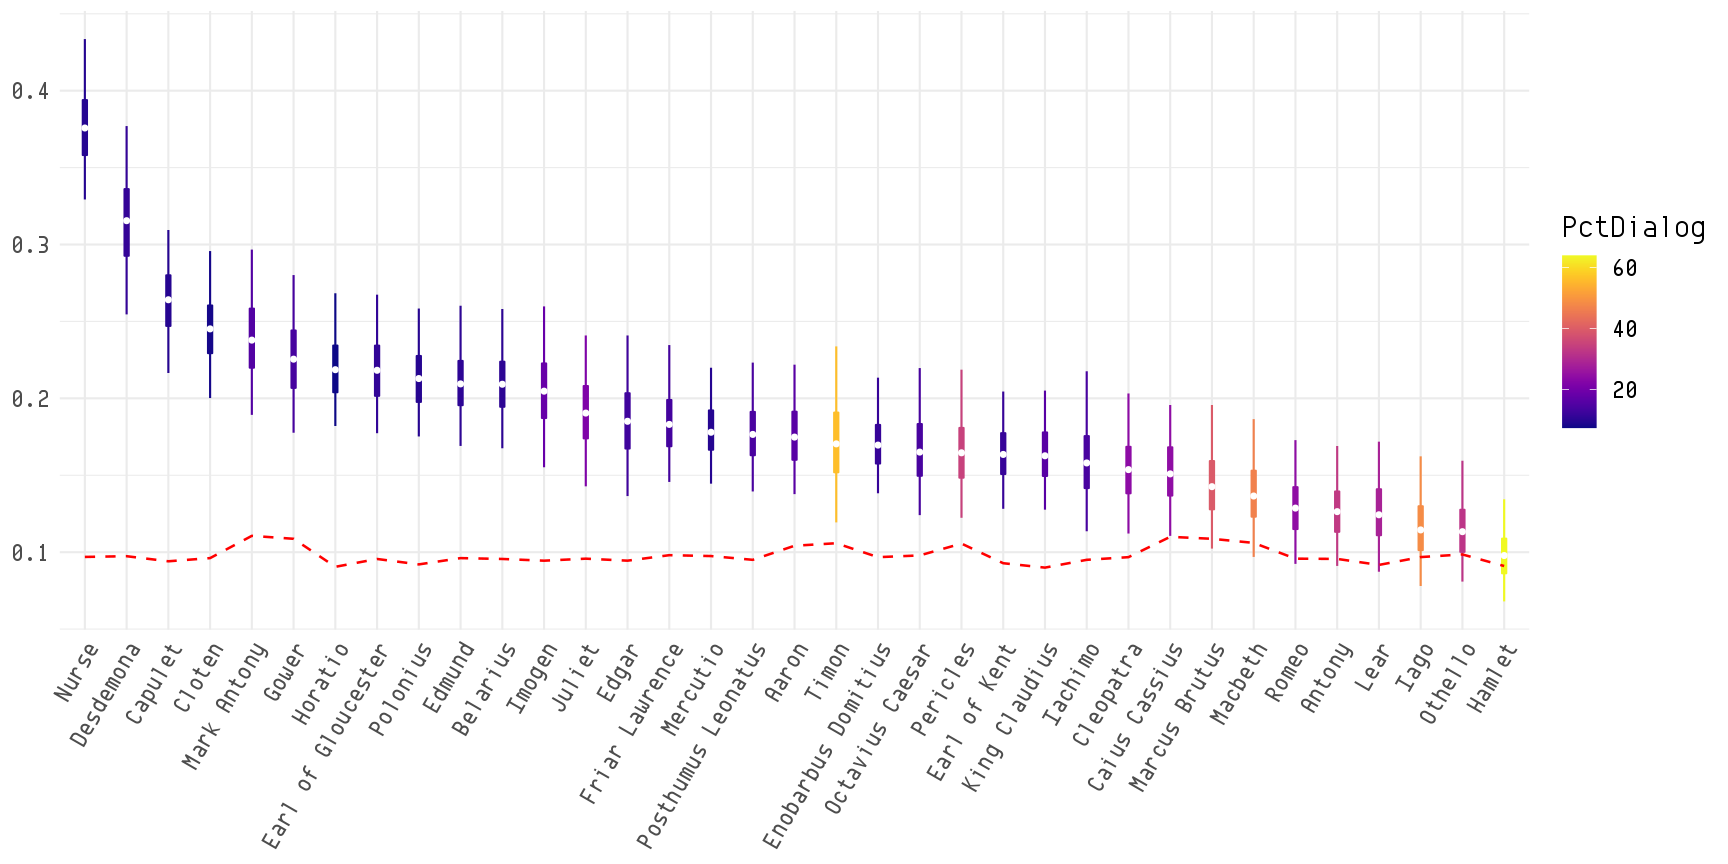

In [16]:
%%R -i wasserstein_df -h 6 -w 12 -u in -r 144
library(ggplot2)
library(viridis)

ggplot(wasserstein_df, aes(x=reorder(Char,-VersusOther50))) +
geom_boxplot(
    aes(
        lower = VersusOther25, 
        upper = VersusOther75, 
        middle = VersusOther50, 
        ymin = VersusOther5, 
        ymax = VersusOther95,
        color=PctDialog,
        fill=PctDialog
    ),
    width = 0.1,
    stat = "identity"
) +
geom_point(aes(y = VersusOther50), color='white', size=1) +
geom_line(aes(y = VersusSelf50,group=1), color='red', size=0.6, linetype='dashed') +
scale_fill_viridis(option='plasma') +
scale_color_viridis(option='plasma',guide='none') +
theme_minimal() +

theme(
    panel.border = element_blank(),
    #legend.position='none',
    axis.title.x=element_blank(),
    axis.ticks.x=element_blank(),
    axis.title.y=element_blank(),
    axis.text.x=element_text(angle = 60, hjust = 1),
    text=element_text(size=15, family="Envy Code R"),
)

In [18]:
import ray
import time

# Start Ray.
ray.init()

@ray.remote
def f(x):
    time.sleep(1)
    return x

# Start 4 tasks in parallel.
result_ids = []
for i in range(4):
    result_ids.append(f.remote(i))
    
# Wait for the tasks to complete and retrieve the results.
# With at least 4 cores, this will take 1 second.
results = ray.get(result_ids)  # [0, 1, 2, 3]

In [19]:
results

[0, 1, 2, 3]

In [57]:
# quick POC
def bootstrap(a, b, cv, n=999, alpha=0.05):
    
    def energy(a,b, cv):
        # +transform+ returns a 
        # sparse CSR matrix, which we convert to an np.ndarray and 
        # then take the first row. Samples are the same size, so we 
        # don't need to scale. np.random.choice is a sample with
        # replacement (normal for bootstrap samples)
        samp1 = cv.transform([np.random.choice(a,10000)]).toarray()[0]
        samp2 = cv.transform([np.random.choice(b,10000)]).toarray()[0]
        return stats.energy_distance(samp1, samp2)
    
    res = np.zeros(n)
    for i in range(n):
        res[i] = energy(a,b, cv)
    res.sort()
    alphas = np.array([alpha/2, 0.25, 0.5, 0.75, 1 - alpha/2])
    nvals = np.round((n - 1) * alphas).astype(int)
    return res[nvals]

@ray.remote
def char_results(char, pn, this_tg, other_tg, cv):
    vocab_sz = len(set(this_tg))
    vocab_pct = len(set(this_tg))/len(cv.get_feature_names_out())*100
    play_pct = len(this_tg)/len(other_tg)*100
    vs_other = bootstrap(this_tg, other_tg, cv)
    vs_self = bootstrap(this_tg, this_tg, cv)

    hsh = {
        'Char':char,
        'Play':pn,
        'VocabSz':vocab_sz,
        'PctVocab':vocab_pct,
        'PctDialog':play_pct,
        'VersusSelf5':vs_self[0],
        'VersusSelf25':vs_self[1],
        'VersusSelf50':vs_self[2],
        'VersusSelf75':vs_self[3],
        'VersusSelf95':vs_self[4],
        'VersusOther5':vs_other[0],
        'VersusOther25':vs_other[1],
        'VersusOther50':vs_other[2],
        'VersusOther75':vs_other[3],
        'VersusOther95':vs_other[4],
    }
    return hsh

df_trim = allstars_long[allstars_long.corpus=='shake']
results = []

for pn, play_df in df_trim.groupby('playName'):
    all = allstars[(allstars.playName==pn)]
    all_threegrams = threegram_bag(all.cleanText)

    # We need a vectorizer that takes an existing sequence of 
    # 3-grams to work with the way we're doing sampling.
    cv = CountVectorizer(analyzer=lambda x: x)

    # Now we can transform any vector of 3-grams and the feature 
    # universes will all be the same. fit on the whole play to 
    # learn the full 3-gram vocab
    cv.fit([all_threegrams])
    print('='*40)
    print(f"Starting {pn} -- total 3-gram vocab is {len(cv.get_feature_names_out())}, total cast is {len(all)}")

    for r in play_df.itertuples(index=False):
        others = allstars[(allstars.playName==r.playName) & (r.label != allstars.label)]
        this_char_threegrams = threegrams(r.cleanText)
        other_chars_threegrams = threegram_bag(others.cleanText)
        results.append(char_results.remote(r.label, pn, this_char_threegrams, other_chars_threegrams, cv))

energy_df = pd.DataFrame(ray.get(results))



Starting a-midsummer-night-s-dream -- total 3-gram vocab is 3316, total cast is 25
Starting all-s-well-that-ends-well -- total 3-gram vocab is 3422, total cast is 29
Starting antony-and-cleopatra -- total 3-gram vocab is 3514, total cast is 74
Starting as-you-like-it -- total 3-gram vocab is 3353, total cast is 28
Starting coriolanus -- total 3-gram vocab is 3457, total cast is 67
Starting cymbeline -- total 3-gram vocab is 3557, total cast is 41
Starting hamlet -- total 3-gram vocab is 3824, total cast is 38
Starting henry-iv-part-i -- total 3-gram vocab is 3697, total cast is 36
Starting henry-iv-part-ii -- total 3-gram vocab is 3629, total cast is 49
Starting henry-v -- total 3-gram vocab is 3990, total cast is 48
Starting henry-vi-part-1 -- total 3-gram vocab is 3542, total cast is 63
Starting henry-vi-part-2 -- total 3-gram vocab is 3612, total cast is 72
Starting henry-vi-part-3 -- total 3-gram vocab is 3435, total cast is 48
Starting henry-viii -- total 3-gram vocab is 3378, tot

In [44]:
len(energy_df.Char.unique())

122

In [54]:
energy_df.Char = [f"{x}  " for x in range(127)] + energy_df.Char

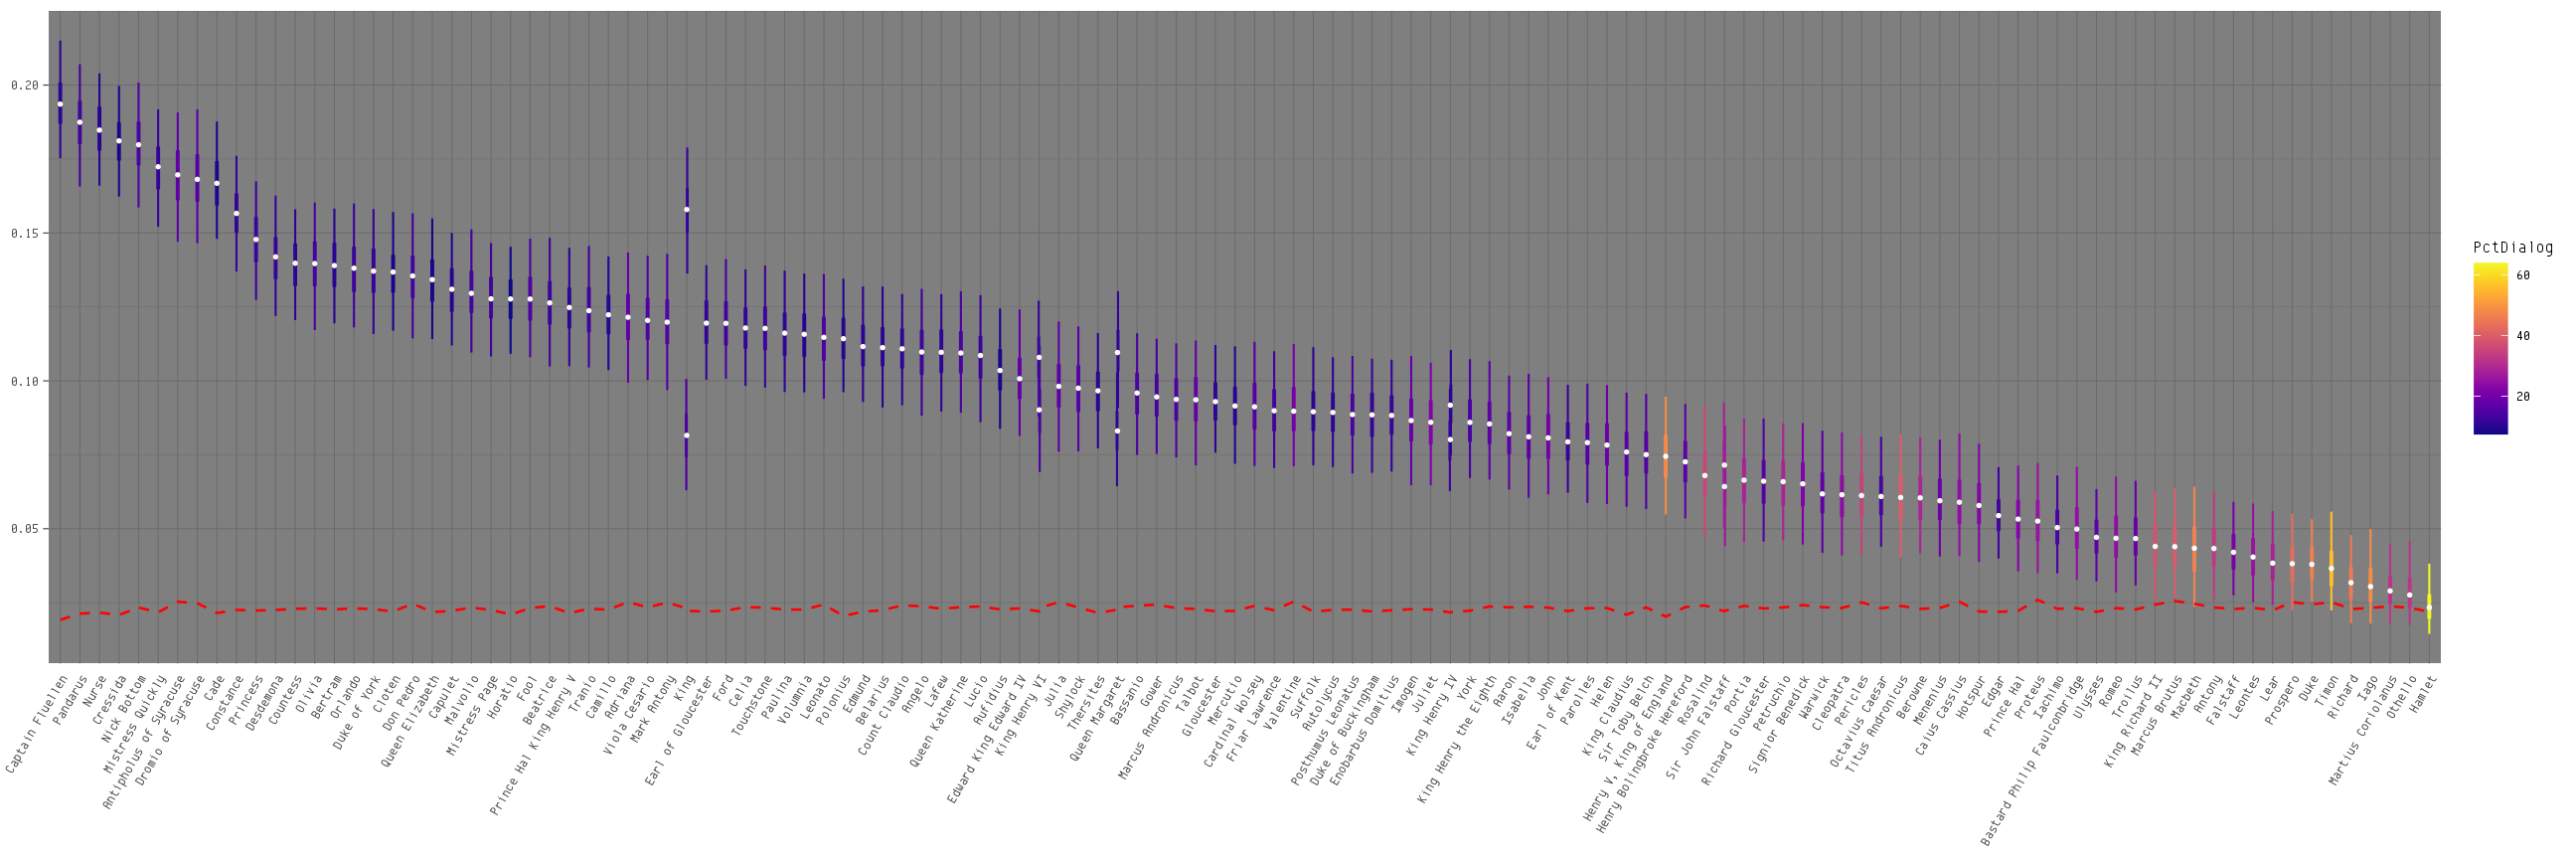

In [64]:
%%R -i energy_df -h 6 -w 18 -u in -r 144
library(ggplot2)
library(viridis)

ggplot(energy_df, aes(x=reorder(Char,-VersusOther50))) +
geom_boxplot(
    aes(
        lower = VersusOther25, 
        upper = VersusOther75, 
        middle = VersusOther50, 
        ymin = VersusOther5, 
        ymax = VersusOther95,
        color=PctDialog,
        fill=PctDialog,
        group=interaction(Char,Play)
    ),
    width = 0.1,
    stat = "identity"
) +
geom_point(aes(y = VersusOther50), color='white', size=0.6) +
geom_line(aes(y = VersusSelf50,group=1), color='red', size=0.6, linetype='dashed') +
scale_fill_viridis(option='plasma') +
scale_color_viridis(option='plasma',guide='none') +
theme_dark() +

theme(
    panel.border = element_blank(),
    #legend.position='none',
    axis.title.x=element_blank(),
    axis.ticks.x=element_blank(),
    axis.title.y=element_blank(),
    axis.text.x=element_text(angle = 60, hjust = 1),
    text=element_text(size=8, family="Envy Code R"),
)